## About Dataset
This dataset contains information on energy consumption and various weather parameters such as solar radiation, temperature, pressure, humidity, wind speed, and precipitation. The "Energy delta[Wh]" column represents the change in energy consumption over a certain time period, while the "GHI" column measures the Global Horizontal Irradiance, which is the amount of solar radiation received by a horizontal surface. The dataset also includes information on the presence of sunlight ("isSun"), the length of daylight ("dayLength"), and the amount of time during which sunlight is available ("sunlightTime"). The "weather_type" column provides information on the overall weather conditions such as clear, cloudy, or rainy. The dataset is organized by hour and month, making it ideal for studying the relationship between renewable energy generation and weather patterns over time.

In [2]:
#import necesaary libraries
import zipfile
import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
#download the dataset
!kaggle datasets download -d samanemami/renewable-energy-and-weather-conditions

renewable-energy-and-weather-conditions.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
zip_file = ("renewable-energy-and-weather-conditions.zip")

In [5]:
#read the csv file using pandas
df = pd.read_csv("solar_weather.csv")

In [6]:
#copy the original file
weather = df.copy()

In [7]:
weather.shape

(196776, 17)

In [8]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  isSun                   196776 non-null  int64  
 11  sunlightTime            196776 non-null  int64  
 12  dayLength               196776 non-null  int64  
 13  SunlightTime/daylength  196776 non-null  float64
 14  weather_type        

In [9]:
weather.isnull().sum()

Time                      0
Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
dtype: int64

In [10]:
weather.head(10)

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1
5,2017-01-01 01:15:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1
6,2017-01-01 01:30:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1
7,2017-01-01 01:45:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1
8,2017-01-01 02:00:00,0,0.0,1.9,1020,100,5.5,0.0,0.0,100,0,0,450,0.0,4,2,1
9,2017-01-01 02:15:00,0,0.0,1.9,1020,100,5.5,0.0,0.0,100,0,0,450,0.0,4,2,1


In [11]:
weather.columns

Index(['Time', 'Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
       'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'isSun',
       'sunlightTime', 'dayLength', 'SunlightTime/daylength', 'weather_type',
       'hour', 'month'],
      dtype='object')

In [12]:
#change data types
weather['Time'] = pd.to_datetime(df['Time'])
weather.drop(['hour','month','SunlightTime/daylength'], axis=1,inplace=True)

weather['Year'] = weather['Time'].dt.year
weather['Month'] = weather['Time'].dt.month
weather['Day'] = weather['Time'].dt.day
weather['Hour'] = weather['Time'].dt.hour

In [13]:
weather.head(5)

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,weather_type,Year,Month,Day,Hour
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,4,2017,1,1,0
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,4,2017,1,1,0
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,4,2017,1,1,0
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,4,2017,1,1,0
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,4,2017,1,1,1


### Exploratory Data Analysis

#### 1. How does energy consumption vary with changes in Global Horizontal Irradiance (GHI)?

### Another way to plot

#### Create a single figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(6, 14))

#### Plot 1: Energy Consumption and GHI by Month
sns.lineplot(x=weather['Month'], y=weather['Energy delta[Wh]'], color='midnightblue', ax=axes[0], label='Energy Consumption (Wh)')
axes[0].set_xlabel('Months')
axes[0].set_ylabel('Energy Consumption(Wh)')
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

ax2 = axes[0].twinx()
sns.lineplot(x=weather['Month'], y=weather['GHI'], color='red', ax=ax2, label='GHI')
ax2.set_ylabel('GHI')
ax2.legend()

#### Plot 2: Energy Consumption and GHI by Hour
sns.lineplot(x=weather['Hour'], y=weather['Energy delta[Wh]'], color='midnightblue', ax=axes[1], label='Energy Consumption (Wh)')
axes[1].set_xlabel('Hours')
axes[1].set_ylabel('Energy Consumption (Wh)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend()

ax2 = axes[1].twinx()
sns.lineplot(x=weather['Hour'], y=weather['GHI'], color='red', ax=ax2, label='GHI')
ax2.set_ylabel('GHI')
ax2.legend()

#### Plot 3: Energy Consumption and GHI by Year
sns.lineplot(x=weather['Year'], y=weather['Energy delta[Wh]'], color='midnightblue', ax=axes[2], label='Energy Consumption (Wh)')
axes[2].set_xlabel('Years')
axes[2].set_ylabel('Energy Consumption (Wh)')
axes[2].grid(True, linestyle='--', alpha=0.6)
axes[2].legend()

ax2 = axes[2].twinx()
sns.lineplot(x=weather['Year'], y=weather['GHI'], color='red', ax=ax2, label='GHI')
ax2.set_ylabel('GHI')
ax2.legend()

#### Set titles
axes[0].set_title('Energy Consumption and GHI by Month')
axes[1].set_title('Energy Consumption and GHI by Hour')
axes[2].set_title('Energy Consumption and GHI by Year')

#### Adjust spacing between subplots
plt.tight_layout()

#### Display the figure
plt.show()


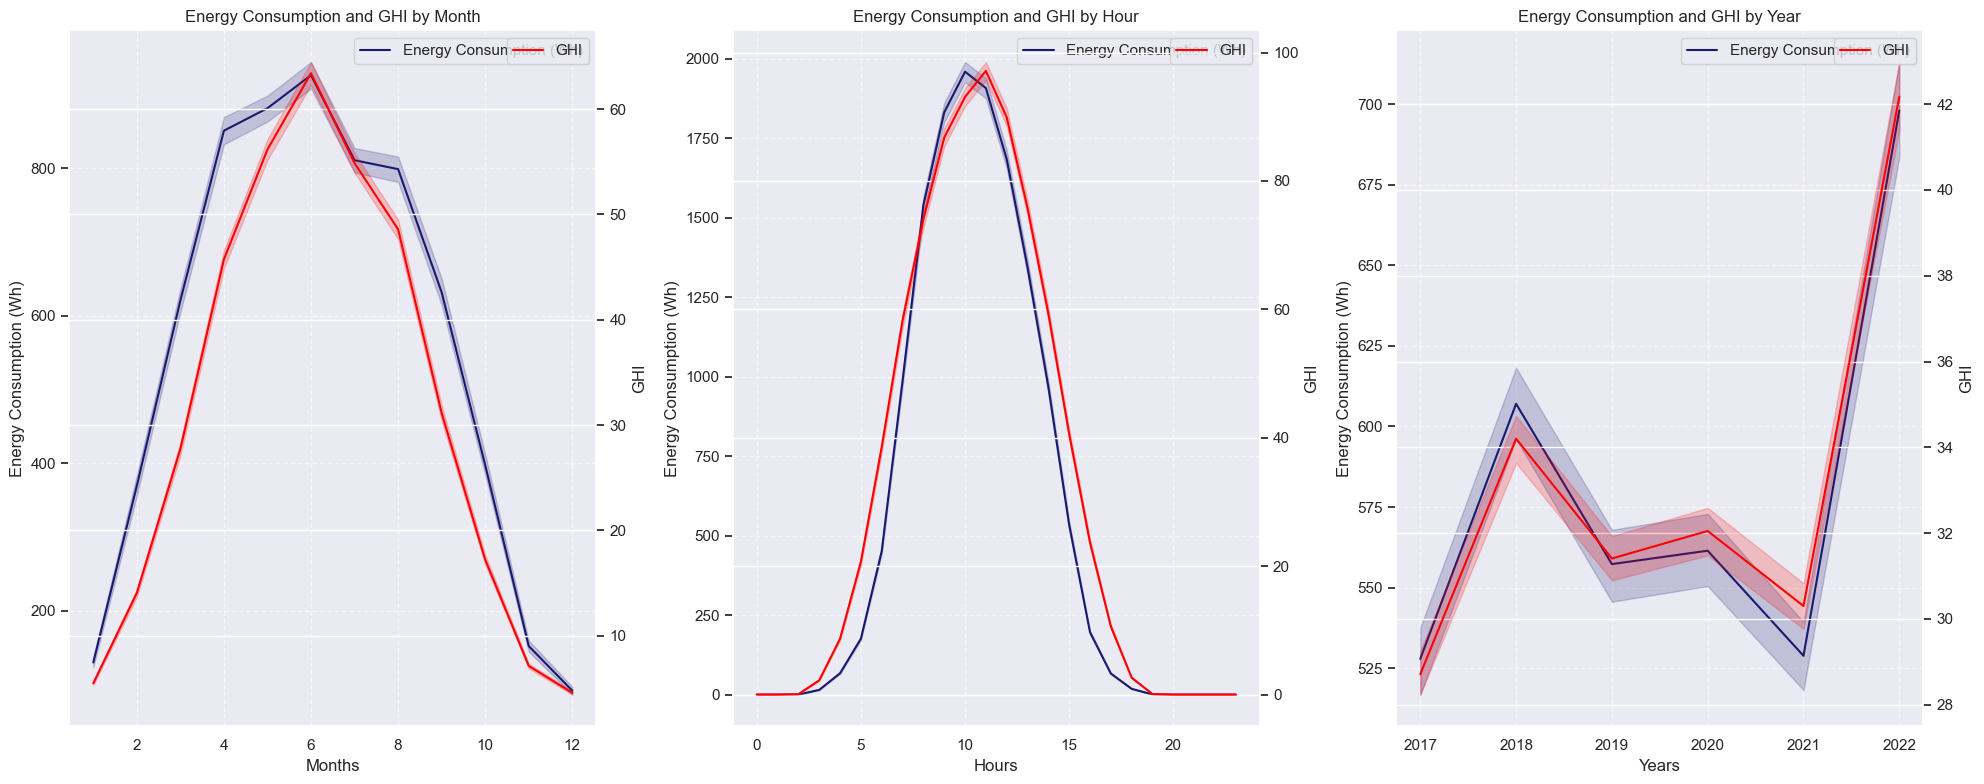

In [41]:
# Create a single figure with three subplots in a single row
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Plot 1: Energy Consumption and GHI by Month
sns.lineplot(x=weather['Month'], y=weather['Energy delta[Wh]'], color='midnightblue', ax=axes[0], label='Energy Consumption (Wh)')
axes[0].set_xlabel('Months')
axes[0].set_ylabel('Energy Consumption (Wh)')
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

ax2 = axes[0].twinx()
sns.lineplot(x=weather['Month'], y=weather['GHI'], color='red', ax=ax2, label='GHI')
ax2.set_ylabel('GHI')
ax2.legend()

# Plot 2: Energy Consumption and GHI by Hour
sns.lineplot(x=weather['Hour'], y=weather['Energy delta[Wh]'], color='midnightblue', ax=axes[1], label='Energy Consumption (Wh)')
axes[1].set_xlabel('Hours')
axes[1].set_ylabel('Energy Consumption (Wh)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend()

ax2 = axes[1].twinx()
sns.lineplot(x=weather['Hour'], y=weather['GHI'], color='red', ax=ax2, label='GHI')
ax2.set_ylabel('GHI')
ax2.legend()

# Plot 3: Energy Consumption and GHI by Year
sns.lineplot(x=weather['Year'], y=weather['Energy delta[Wh]'], color='midnightblue', ax=axes[2], label='Energy Consumption (Wh)')
axes[2].set_xlabel('Years')
axes[2].set_ylabel('Energy Consumption (Wh)')
axes[2].grid(True, linestyle='--', alpha=0.6)
axes[2].legend()

ax2 = axes[2].twinx()
sns.lineplot(x=weather['Year'], y=weather['GHI'], color='red', ax=ax2, label='GHI')
ax2.set_ylabel('GHI')
ax2.legend()

# Set titles
axes[0].set_title('Energy Consumption and GHI by Month')
axes[1].set_title('Energy Consumption and GHI by Hour')
axes[2].set_title('Energy Consumption and GHI by Year')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


#### 2. Are there any noticeable seasonal patterns in energy consumption, and how do they correlate with temperature variations?

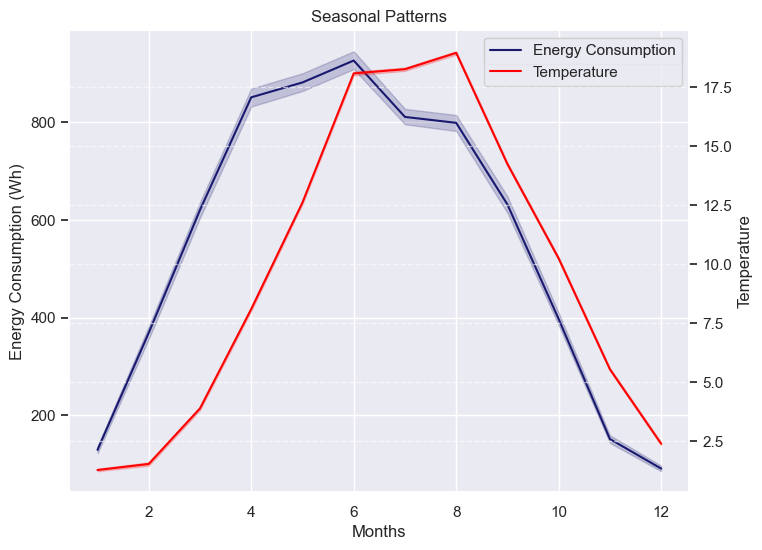

In [15]:
# Create a line plot of energy consumption and temperature
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

# Plot Energy Consumption on the primary y-axis
sns.lineplot(x=weather['Month'], y=weather['Energy delta[Wh]'], color='midnightblue', label='Energy Consumption')
plt.xlabel('Months')
plt.ylabel('Energy Consumption (Wh)')

# Get the current axes
ax1 = plt.gca()

# Plot GHI on the secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(x=weather['Month'], y=weather['temp'], color='red', label='Temperature')
ax2.set_ylabel('Temperature')

# Set title and legend
plt.title('Seasonal Patterns')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
plt.legend(lines, labels)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### 3. What is the relationship between the presence of sunlight (isSun) and energy consumption?

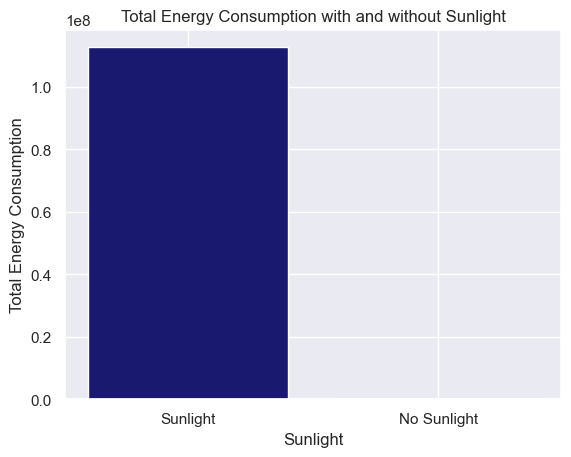

In [28]:
# Calculate total energy consumption for 'Sunlight' and 'No Sunlight'
sunlight_energy = weather[weather['isSun'] == 1]['Energy delta[Wh]'].sum()
no_sunlight_energy = weather[weather['isSun'] == 0]['Energy delta[Wh]'].sum()

# Create a stacked bar chart
plt.bar(['Sunlight', 'No Sunlight'], [sunlight_energy, no_sunlight_energy], color=['midnightblue', 'lightgray'])
plt.xlabel('Sunlight')
plt.ylabel('Total Energy Consumption')
plt.title('Total Energy Consumption with and without Sunlight')
plt.show()


#### 4. What is the relation between the length of daylight (dayLength) and energy consumption?

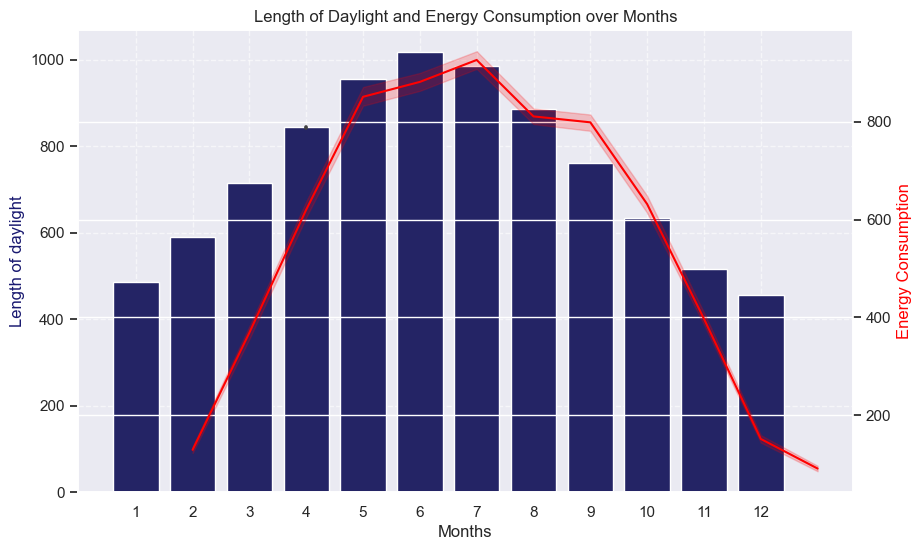

In [29]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first dataset on the primary y-axis
sns.barplot(x=weather['Month'], y=weather['dayLength'], color='midnightblue', data=weather, ax=ax1)
ax1.set_xlabel('Months')
ax1.set_ylabel('Length of daylight', color='midnightblue')
ax1.set_title('Length of Daylight and Energy Consumption over Months')
ax1.grid(True, linestyle='--', alpha=0.6)

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the second dataset on the secondary y-axis
sns.lineplot(x=weather['Month'], y=weather['Energy delta[Wh]'], color='red', data=weather, ax=ax2)
ax2.set_ylabel('Energy Consumption', color='red')

# Show the combined plot
plt.show()


#### 5. What is the impact of wind speed on energy consumption, especially for renewable energy sources like wind power?

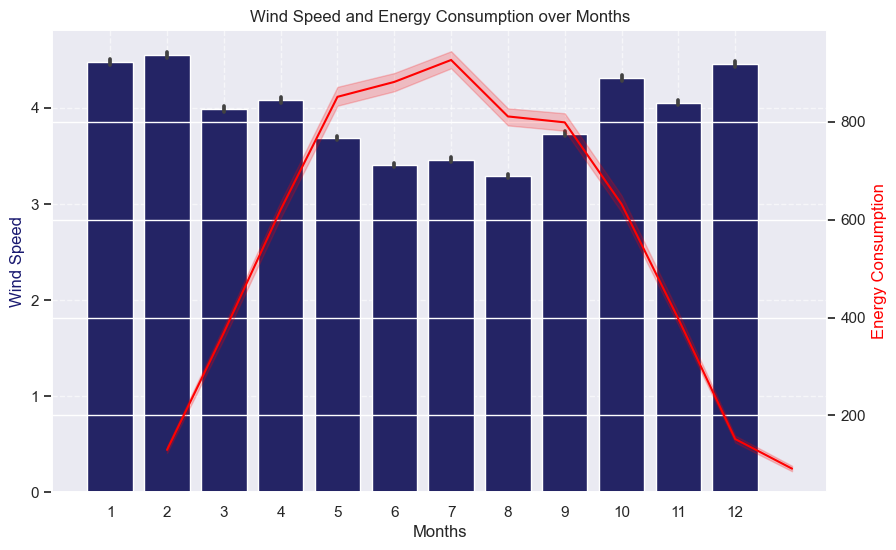

In [31]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first dataset on the primary y-axis
sns.barplot(x=weather['Month'], y=weather['wind_speed'], color='midnightblue', data=weather, ax=ax1)
ax1.set_xlabel('Months')
ax1.set_ylabel('Wind Speed', color='midnightblue')
ax1.set_title('Wind Speed and Energy Consumption over Months')
ax1.grid(True, linestyle='--', alpha=0.6)

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the second dataset on the secondary y-axis
sns.lineplot(x=weather['Month'], y=weather['Energy delta[Wh]'], color='red', data=weather, ax=ax2)
ax2.set_ylabel('Energy Consumption', color='red')

# Show the combined plot
plt.show()

#### 6. Energy Consumption based on the weather type

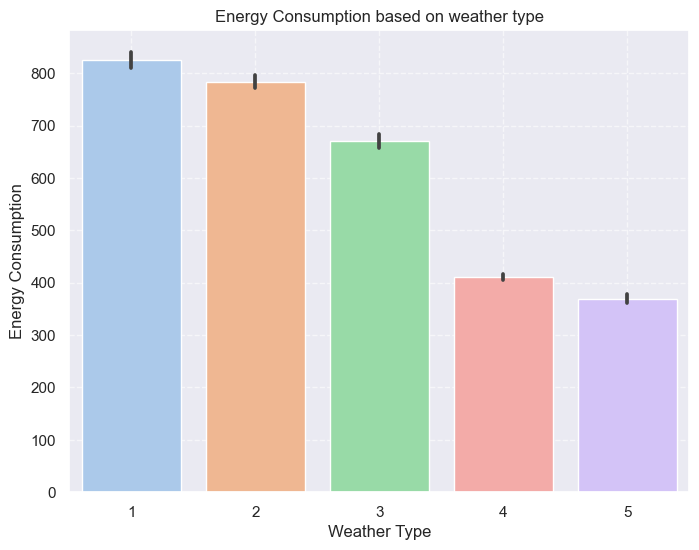

In [35]:
plt.figure(figsize=(8,6))
sns.set_palette('pastel')
sns.barplot(x = weather['weather_type'], y = weather['Energy delta[Wh]'], data = weather)
plt.xlabel('Weather Type')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption based on weather type')
plt.grid(True, linestyle='--', alpha=0.6)

#### 7. Energy consumption , pressure and humidity by months

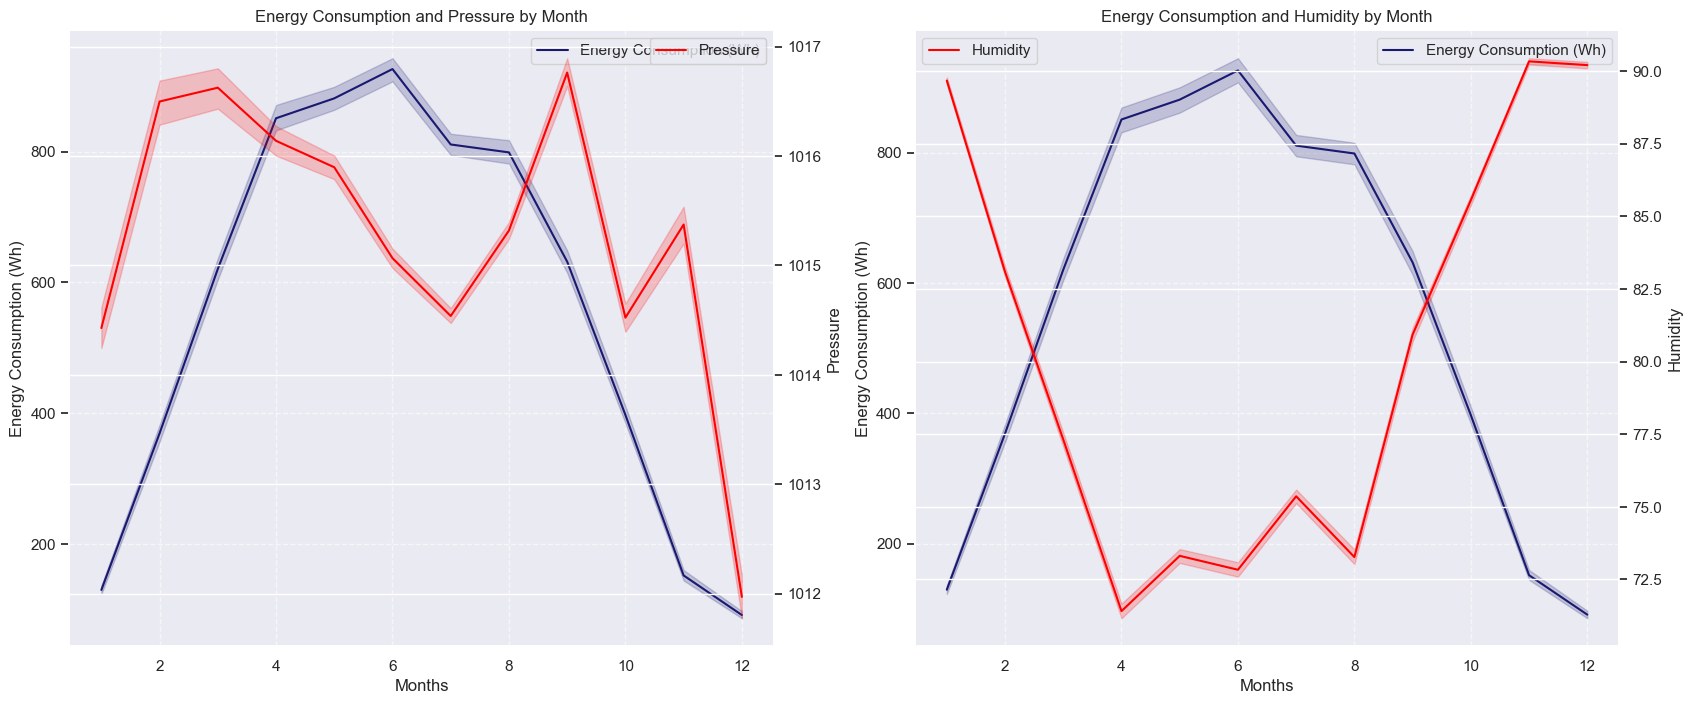

In [39]:
# Create a single figure with three subplots in a single row
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Energy Consumption and pressure by Month
sns.lineplot(x=weather['Month'], y=weather['Energy delta[Wh]'], color='midnightblue', ax=axes[0], label='Energy Consumption (Wh)')
axes[0].set_xlabel('Months')
axes[0].set_ylabel('Energy Consumption (Wh)')
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

ax2 = axes[0].twinx()
sns.lineplot(x=weather['Month'], y=weather['pressure'], color='red', ax=ax2, label='Pressure')
ax2.set_ylabel('Pressure')
ax2.legend()

# Plot 2: Energy Consumption and Humidity by Month
sns.lineplot(x=weather['Month'], y=weather['Energy delta[Wh]'], color='midnightblue', ax=axes[1], label='Energy Consumption (Wh)')
axes[1].set_xlabel('Months')
axes[1].set_ylabel('Energy Consumption (Wh)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend()

ax2 = axes[1].twinx()
sns.lineplot(x=weather['Month'], y=weather['humidity'], color='red', ax=ax2, label='Humidity')
ax2.set_ylabel('Humidity')
ax2.legend()

# Set titles
axes[0].set_title('Energy Consumption and Pressure by Month')
axes[1].set_title('Energy Consumption and Humidity by Month')

# Display the figure
plt.show()
